# HW1 - Sivan Oddes & Nadav Magal

## 1. warm up


a) IDE - Integrated Development environment - is a software application that provide comprehensive facilities to computer programmers for software development. An IDE normally consists of a source code editor, build automation tools and a debugger.

b) information about the follow packages:
 - numpy - An extension to the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large library of high-level mathematical functions to operate on these arrays.
 - scipy - An open source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering. SciPy builds on the NumPy array object and is part of the NumPy stack which includes tools like Matplotlib, pandas and SymPy. 
 - matplotlib - matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits.
 - pandas - Python Data Analysis Library - a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
 - scikit-learn -  machine learning library for the Python programming language.[2] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
 - NLTK - The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language.
 
 tool from each package i think is important:
 - numpy - array - array is one of the most useful data structure. we can use it for various application, and it make the enviorment act like Matlab.
 - scipy - fftpack - helpful tool for doing fourier transform on our signals. 
 - matplotlib - plot is an important tool helping us plotting varios kind of graph on our data. 
 - pandas - read_csv helps us read and manipulate csv files.
 - scikit-learn - SVD algorithem is available in this package and it can be very useful.
 - NLTK - token is a tool separating words in a sentance.

## part 2 
done

## part 3


### loading airport.dat.txt data

In [23]:
import csv
f = open("airports.dat")
for row in csv.reader(f):
    print(row[1])

Goroka Airport
Madang Airport
Mount Hagen Kagamuga Airport
Nadzab Airport
Port Moresby Jacksons International Airport
Wewak International Airport
Narsarsuaq Airport
Godthaab / Nuuk Airport
Kangerlussuaq Airport
Thule Air Base
Akureyri Airport
Egilsstaðir Airport
Hornafjörður Airport
Húsavík Airport
Ísafjörður Airport
Keflavik International Airport
Patreksfjörður Airport
Reykjavik Airport
Siglufjörður Airport
Vestmannaeyjar Airport
Sault Ste Marie Airport
Winnipeg / St. Andrews Airport
Halifax / CFB Shearwater Heliport
St. Anthony Airport
Tofino / Long Beach Airport
Kugaaruk Airport
Baie Comeau Airport
CFB Bagotville
Baker Lake Airport
Campbell River Airport
Brandon Municipal Airport
Cambridge Bay Airport
Nanaimo Airport
Castlegar/West Kootenay Regional Airport
Miramichi Airport
Charlo Airport
Kugluktuk Airport
Coronation Airport
Chilliwack Airport
Clyde River Airport
Coral Harbour Airport
Dawson City Airport
Burwash Airport
Princeton Airport
Deer Lake Airport
Dease Lake Airport
Dauphin

### pinting airport names of a specifig country I like

In [24]:
import csv
f = open("airports.dat")
for row in csv.reader(f):
    if row[3] == "Iceland":
        print(row[1])

Akureyri Airport
Egilsstaðir Airport
Hornafjörður Airport
Húsavík Airport
Ísafjörður Airport
Keflavik International Airport
Patreksfjörður Airport
Reykjavik Airport
Siglufjörður Airport
Vestmannaeyjar Airport
Bakki Airport
Grímsey Airport
Thorshofn Airport
Vopnafjörður Airport
Reykjahlíð Airport
Bildudalur Airport
Gjögur Airport
Sauðárkrókur Airport
Selfoss Airport
Norðfjörður Airport


### program that counts the number of airport in each country

In [33]:
f = open("airports.dat")

counts = {}

for row in csv.reader(f):
    country = row[3]
    if country not in counts:
        counts[country] = 1
    else:
        counts[country] = counts[country] + 1

for curCounry in counts:
    count = counts[curCounry]
    print(curCounry + ": " + str(count))

Canada: 417
East Timor: 3
Sao Tome and Principe: 2
Guernsey: 2
Saint Helena: 1
Georgia: 5
Lithuania: 9
Saint Pierre and Miquelon: 2
Ethiopia: 29
Aruba: 1
Sri Lanka: 12
Swaziland: 1
Palestine: 1
Argentina: 94
Bolivia: 23
Cameroon: 10
Burkina Faso: 2
Turkmenistan: 5
Ghana: 6
Saudi Arabia: 44
Cape Verde: 7
Cocos (Keeling) Islands: 1
Slovenia: 5
Guatemala: 10
Bosnia and Herzegovina: 4
Kuwait: 3
Jordan: 5
Spain: 62
Australia: 296
Liberia: 3
Congo (Kinshasa): 44
Pakistan: 52
Oman: 6
Tanzania: 23
Martinique: 1
Isle of Man: 1
Gabon: 13
Cambodia: 9
Wallis and Futuna: 2
New Zealand: 52
Yemen: 11
Jersey: 1
Jamaica: 6
Namibia: 16
Albania: 5
Samoa: 3
Macau: 1
British Indian Ocean Territory: 1
Norfolk Island: 1
United Arab Emirates: 17
Guam: 2
India: 125
Azerbaijan: 7
Lesotho: 3
Congo (Brazzaville): 3
Saint Vincent and the Grenadines: 5
Kenya: 35
South Korea: 29
Tajikistan: 4
Turkey: 72
Falkland Islands: 2
Czech Republic: 24
Eritrea: 3
Solomon Islands: 23
Saint Lucia: 2
French Polynesia: 36
France: 

## part 4

In [34]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [35]:
# making dictionaries of airport id and ints longtitude and latitude
airports_f = open("airports.dat")

airportLatitude = {}
airportLongtitude = {}

for row in csv.reader(airports_f):
    airportID = row[0]
    airportLatitude[airportID] = row[6]
    airportLongtitude[airportID] = row[7]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


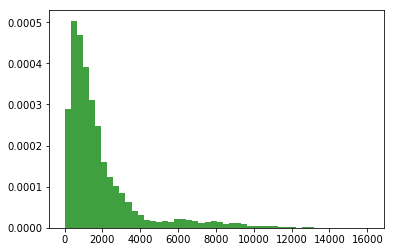

In [36]:
# making list of distances
from geo_distance import distance
%load_ext autoreload
%autoreload 2

routs_f = open("routes.dat")

dstList = []

for row in csv.reader(routs_f):
    sourceAirportID = row[3]
    destAirportID =  row[5]
    
    if destAirportID == "\\N" or sourceAirportID == "\\N":
        # Ignoring line that is missing information
        continue
    
    if not(airportLongtitude.has_key(sourceAirportID)) or not(airportLongtitude.has_key(destAirportID)) or not(airportLatitude.has_key(sourceAirportID)) or not(airportLatitude.has_key(destAirportID)):
        # Ignoring line that is missing information
        continue
   
    srcAirport_longtitude_str = airportLongtitude[sourceAirportID]
    srcAirport_latitude_str = airportLatitude[sourceAirportID]
    dstAirport_longtitude_str = airportLongtitude[destAirportID] 
    dstAirport_latitude_str = airportLatitude [destAirportID]
    
    #print("src long: " + srcAirport_longtitude_str)
    #print("src lat: " + srcAirport_latitude_str)
    #print("dst long: " + dstAirport_longtitude_str)
    #print("dst lat: " + dstAirport_latitude_str)
    
    srcAirport_longtitude = float(srcAirport_longtitude_str)
    srcAirport_latitude = float(srcAirport_latitude_str)
    dstAirport_longtitude = float(dstAirport_longtitude_str)    
    dstAirport_latitude = float(dstAirport_latitude_str)
    


    
    curDist = distance(srcAirport_latitude,srcAirport_longtitude,dstAirport_latitude,dstAirport_longtitude)
    dstList.append(curDist)
    
%matplotlib inline
plt.hist(dstList, 50, normed=1, facecolor='g', alpha=0.75)
plt.show()